In [1]:
import tensorflow as tf
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

print(tf.__version__)

2.4.1


# Section 5.2 in the book 'Deeplearning with Python" by Francois Challet

  1. CONVOLUTION LAYER TO CLASSIFY DOGS VS CATS.
  2. DATA AUGMENTATION TECHNIQUE TO OVERCOME OVER-FITTING.
  
  CATS - DOGS DATA HAS TO BE TAKEN FROM : https://www.kaggle.com/c/dogs-vs-cats \
  data/train/cats - 1000 cat images \
  data/train/dogs - 1000 dog images \
  data/validation/cats - 500 cat images \
  data/validation/dogs - 500 dog images \
  data/test/cats - 500 cat images \
  data/test/dogs - 500 dog images

In [2]:
import os, shutil

base_dir = './DATA/CATS_DOGS'

train_dir = os.path.join(base_dir, 'train')
train_cat_dir = os.path.join(train_dir, 'cats')
train_dog_dir = os.path.join(train_dir, 'dogs')
test_dir = os.path.join(base_dir, 'test')
test_cat_dir = os.path.join(test_dir, 'cats')
test_dog_dir = os.path.join(test_dir, 'dogs')
val_dir = os.path.join(base_dir, 'validation')
val_cat_dir = os.path.join(val_dir, 'cats')
val_dog_dir = os.path.join(val_dir, 'dogs')

print('Total CAT training images ', len(os.listdir(train_cat_dir)))
print('Total DOG training images ' , len(os.listdir(train_dog_dir)))
print('Total CAT test images ', len(os.listdir(test_cat_dir)))
print('Total DOG test images ' , len(os.listdir(test_dog_dir)))
print('Total CAT validation images ' , len(os.listdir(val_cat_dir)))
print('Total DOG training images ', len(os.listdir(val_dog_dir)))

Total CAT training images  1000
Total DOG training images  1000
Total CAT test images  500
Total DOG test images  500
Total CAT validation images  500
Total DOG training images  500


### 1. CLASSIFICATION CONVOLUTIONAL NETWORK

   The Depth of the feature maps progressively increases in the network (from 32 to 128) \
   Where as the size of the feature maps decreases (from 148 X 148 X 7 X 7).
   

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

### 2. Configuring the model for Training

    1. We shall use the RMSprop Optimizer. 
    2. We shall use binary cross entropy as the loss.
    3. And the learning rate is (lr = 1e-4)
    

In [4]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])


### 3. DATA PREPROCESSING OF THE IMAGE FILES.

    1. Read the Images Files.
    2. Decode the JPEG content to RGB grids of pixels.
    3. Convert these into floating-point tensors.
    4. Rescale the pixel values (between 0 to 255) to [0, 1] interval.
    
    All the above functionalities are done by the ImageDataGenerator.

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size=20,
                                                    class_mode='binary')
val_generator = val_datagen.flow_from_directory(val_dir, target_size = (150, 150), batch_size=20,
                                                    class_mode='binary')

for data_batch, labels_batch in train_generator:
    print('data batch shape ', data_batch.shape)
    print('data labels batch shape ', labels_batch.shape)
    break;

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
data batch shape  (20, 150, 150, 3)
data labels batch shape  (20,)


### 4. Running the Model. 
    
    Saving the Model using the model.sava function.
    One thing to remember is that when we give the steps_per_epoch 
    and validation_steps, which tells the process how many batches to draw from the
    train_generator and validation_generator

In [10]:
history = model.fit_generator(
                train_generator, steps_per_epoch=100, epochs=30, 
                validation_data = val_generator, validation_steps=50)

model.save('cats_dogs_small_1.h5')

Epoch 1/30
100/100 [==============================] - 71s 708ms/step - loss: 0.6480 - acc: 0.6340 - val_loss: 0.6500 - val_acc: 0.6060
Epoch 2/30
100/100 [==============================] - 78s 776ms/step - loss: 0.6071 - acc: 0.6830 - val_loss: 0.6033 - val_acc: 0.6890
Epoch 3/30
100/100 [==============================] - 94s 940ms/step - loss: 0.5683 - acc: 0.7140 - val_loss: 0.5889 - val_acc: 0.6930
Epoch 4/30
100/100 [==============================] - 93s 925ms/step - loss: 0.5341 - acc: 0.7340 - val_loss: 0.6515 - val_acc: 0.6420
Epoch 5/30
100/100 [==============================] - 74s 739ms/step - loss: 0.5033 - acc: 0.7475 - val_loss: 0.5502 - val_acc: 0.7220
Epoch 6/30
100/100 [==============================] - 71s 713ms/step - loss: 0.4750 - acc: 0.7765 - val_loss: 0.5620 - val_acc: 0.7020
Epoch 7/30
100/100 [==============================] - 79s 790ms/step - loss: 0.4481 - acc: 0.7895 - val_loss: 0.5345 - val_acc: 0.7180
Epoch 8/30
100/100 [==============================] - 6

### 4. LOSS AND ACCURACY CURVES.
    
    Displaying Loss and Accuracy Curves during training.
    If you close look at the plots you can observe that 
    TRAINING ACCURACY INCREASE's AND VALIDATION ACCURACY stalls at 0.70 and 0.75
    TRAINING LOSS DECREASES AND VALIDATION LOSS KEEPS ON INCREASING. 
    
    This plots indicates that Model is overfitting.

<function matplotlib.pyplot.show(close=None, block=None)>

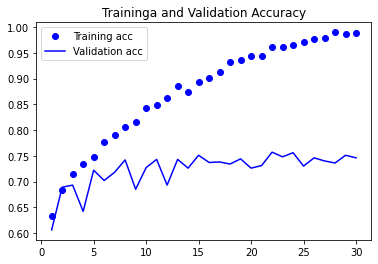

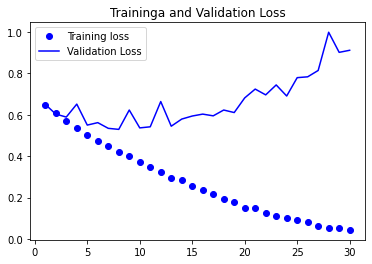

In [14]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Traininga and Validation Accuracy")
plt.legend()

# to plot it in a new figure.
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Traininga and Validation Loss")
plt.legend()

plt.show

### 4. DATA AUGMENTATION & DROP OUT LAYER.
    
    To overcome fitting two methods are followed. 
    1. Introduce new images by rotation/flitting, ImageDataGenrator API can provide this functionality.
    2. Introduce the Dropout Layer. 
    3. Compile the model with dropout layer and Fit the model with augmented data.

In [16]:
from tensorflow.keras import layers
from tensorflow.keras import models

model2 = models.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))

model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [22]:
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers

train_datagen2 = ImageDataGenerator(rescale = 1./255, 
                                   rotation_range=40, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True
                                  )

val_datagen2 = ImageDataGenerator(rescale = 1./255) # Do not augment Validation Data.

train_generator2 = train_datagen2.flow_from_directory(train_dir, 
                                                    target_size = (150, 150), 
                                                    batch_size=20,
                                                    class_mode='binary')
val_generator2 = val_datagen2.flow_from_directory(val_dir, 
                                                target_size = (150, 150), 
                                                batch_size=20,
                                                class_mode='binary')


model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

history = model2.fit_generator(train_generator2,
                               steps_per_epoch=100,
                               epochs=50,
                               validation_data=val_generator2,
                               validation_steps=50)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 80s 788ms/step - loss: 0.6859 - acc: 0.5683 - val_loss: 0.6702 - val_acc: 0.5860
Epoch 2/50
100/100 [==============================] - 76s 759ms/step - loss: 0.6741 - acc: 0.5812 - val_loss: 0.6559 - val_acc: 0.6150
Epoch 3/50
100/100 [==============================] - 85s 851ms/step - loss: 0.6546 - acc: 0.6025 - val_loss: 0.6639 - val_acc: 0.5740
Epoch 4/50
100/100 [==============================] - 71s 705ms/step - loss: 0.6527 - acc: 0.6047 - val_loss: 0.6524 - val_acc: 0.6090
Epoch 5/50
100/100 [==============================] - 70s 703ms/step - loss: 0.6294 - acc: 0.6628 - val_loss: 0.6080 - val_acc: 0.6610
Epoch 6/50
100/100 [==============================] - 70s 700ms/step - loss: 0.6143 - acc: 0.6661 - val_loss: 0.6153 - val_acc: 0.6470
Epoch 7/50
100/100 [==============================] - 71s 706ms/step - loss: 0.6081 - acc: 0.6775 - val_lo

### 5. LOSS AND VALIDATION CURVES.

    Displaying Loss and Accuracy Curves during training.
    Close look at the plots you can observe that
    
    TRAINING ACCURACY INCREASES AND VALIDATION ACCURACY ALSO INCREASES, 
    TRAINING LOSS DECREASES AND VALIDATION LOSS KEEPS DECREASING
    
    BOTH TRAINING n VALIDATION LOSS/ACCURACY DECREASE/INCREASE in the same pattern.
    
    And also we can also see the validation accuracy has increased by around 5% than the 
    unaugmented and no-dropout layer.
    
    This plots indicates that Model is overfitting.

<function matplotlib.pyplot.show(close=None, block=None)>

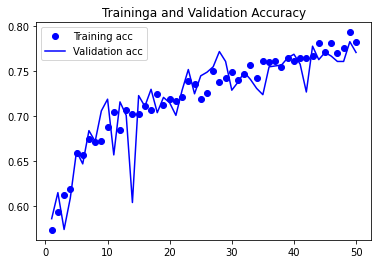

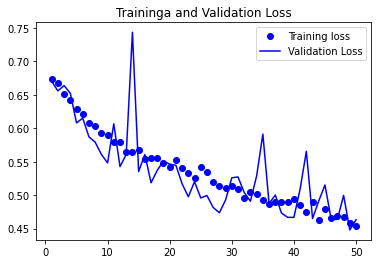

In [23]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title("Traininga and Validation Accuracy")
plt.legend()

# to plot it in a new figure.
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title("Traininga and Validation Loss")
plt.legend()

plt.show